In [1]:
import pandas as pd

Load Dataset

In [2]:
data = pd.read_csv('/content/Bank Loan Prediction.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Remove Columns

In [4]:
data.drop(columns = ['Loan_ID'], inplace=True)
data.drop(columns = ['Loan_Amount_Term'], inplace=True)
data.drop(columns = ['Credit_History'], inplace=True)

In [5]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [6]:
data['Total_Income'] = data.ApplicantIncome + data.CoapplicantIncome

In [7]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,NaN,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,Urban,Y,7583.0


In [8]:
data.drop(columns = ['ApplicantIncome','CoapplicantIncome'], inplace = True)

In [9]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,NaN,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,Urban,Y,7583.0


In [10]:
data.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
LoanAmount,22
Property_Area,0
Loan_Status,0
Total_Income,0


Fill numerical missing values

In [11]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())


In [12]:
data.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
LoanAmount,0
Property_Area,0
Loan_Status,0
Total_Income,0


Fill categorical missing values

In [13]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    data[col] = data[col].fillna(data[col].mode()[0])

In [14]:
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
LoanAmount,0
Property_Area,0
Loan_Status,0
Total_Income,0


In [15]:
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int)

In [16]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,128.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,Rural,Y,2900.0
610,Male,Yes,3,Graduate,No,40.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,Urban,Y,7583.0


In [17]:
data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

Encode binary columns

In [18]:
data['Education'] = data['Education'].replace(['Graduate', 'Not Graduate'],[1,0])
data['Loan_Status'] = data['Loan_Status'].replace(['Y', 'N'],[1,0])
data['Gender'] = data['Gender'].replace(['Male', 'Female'], [1, 0])
data['Married'] = data['Married'].replace(['Yes', 'No'], [1, 0])
data['Self_Employed'] = data['Self_Employed'].replace(['Yes', 'No'], [1, 0])


/tmp/ipython-input-84337171.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education'] = data['Education'].replace(['Graduate', 'Not Graduate'],[1,0])
/tmp/ipython-input-84337171.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Loan_Status'] = data['Loan_Status'].replace(['Y', 'N'],[1,0])
/tmp/ipython-input-84337171.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-i

In [19]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Property_Area,Loan_Status,Total_Income
0,1,0,0,1,0,128.0,Urban,1,5849.0
1,1,1,1,1,0,128.0,Rural,0,6091.0
2,1,1,0,1,1,66.0,Urban,1,3000.0
3,1,1,0,0,0,120.0,Urban,1,4941.0
4,1,0,0,1,0,141.0,Urban,1,6000.0
...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,71.0,Rural,1,2900.0
610,1,1,3,1,0,40.0,Rural,1,4106.0
611,1,1,1,1,0,253.0,Urban,1,8312.0
612,1,1,2,1,0,187.0,Urban,1,7583.0


In [20]:
for col in ['LoanAmount', 'Total_Income']:
    data[col] = data[col].astype(int)


In [21]:
data['Property_Area'] = data['Property_Area'].map({
    'Urban': 2,
    'Semiurban': 1,
    'Rural': 0
})


In [22]:
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Property_Area,Loan_Status,Total_Income
0,1,0,0,1,0,128,2,1,5849
1,1,1,1,1,0,128,0,0,6091
2,1,1,0,1,1,66,2,1,3000
3,1,1,0,0,0,120,2,1,4941
4,1,0,0,1,0,141,2,1,6000
...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,71,0,1,2900
610,1,1,3,1,0,40,0,1,4106
611,1,1,1,1,0,253,2,1,8312
612,1,1,2,1,0,187,2,1,7583


#Visualization

<Axes: xlabel='Education', ylabel='count'>

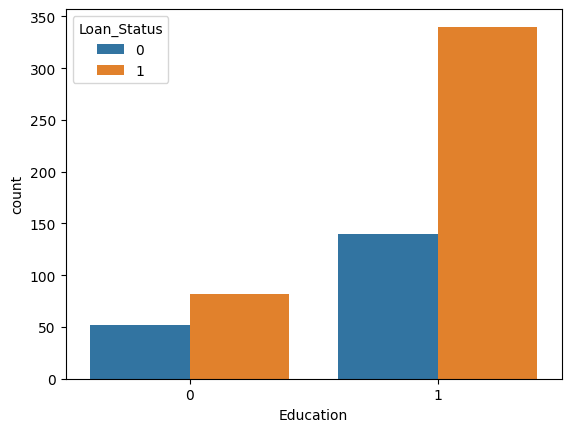

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Education' ,hue='Loan_Status', data=data)

<Axes: xlabel='Married', ylabel='count'>

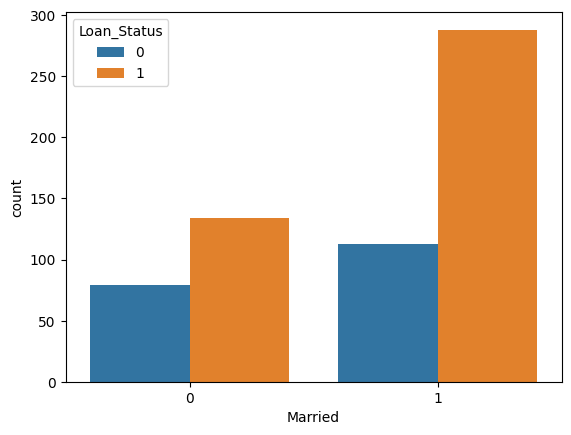

In [24]:
sns.countplot(x='Married' ,hue='Loan_Status', data=data)

#Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
input_data = data.drop(columns=['Loan_Status'])
output_data = data['Loan_Status']


In [27]:
input_data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Property_Area,Total_Income
0,1,0,0,1,0,128,2,5849
1,1,1,1,1,0,128,0,6091
2,1,1,0,1,1,66,2,3000
3,1,1,0,0,0,120,2,4941
4,1,0,0,1,0,141,2,6000
...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,71,0,2900
610,1,1,3,1,0,40,0,4106
611,1,1,1,1,0,253,2,8312
612,1,1,2,1,0,187,2,7583


In [28]:
output_data

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [29]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data, test_size=0.2)

In [30]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((491, 8), (123, 8), (491,), (123,))

#Hybrid Sampling

In [31]:
from imblearn.combine import SMOTETomek


In [32]:
print("\nBefore Balancing:\n", output_data.value_counts())

from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
x_resampled, y_resampled = smt.fit_resample(input_data, output_data)

print("\nAfter Balancing:\n", pd.Series(y_resampled).value_counts())


Before Balancing:
 Loan_Status
1    422
0    192
Name: count, dtype: int64

After Balancing:
 Loan_Status
1    339
0    339
Name: count, dtype: int64


#Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
x_train_scaled = scaler.fit_transform(x_train)

In [36]:
x_test_scaled = scaler.transform(x_test)

#Model Training

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [38]:
# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [39]:
# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [40]:
# Bagging
bag_model = BaggingClassifier()
bag_model.fit(x_train_scaled, y_train)

BaggingClassifier()

In [41]:
# Gradient Boosting
boost_model = GradientBoostingClassifier()
boost_model.fit(x_train_scaled, y_train)

GradientBoostingClassifier()

#Model Evaluting

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

def evaluate_model(name, model, x_train, y_train, x_test, y_test):
    print(f"\n📈 {name} Model Performance")
    # Train Model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {acc * 100:.2f}%")

    # Cross Validation
    cv = cross_val_score(model, x_train, y_train, cv=5).mean()
    print(f"Cross Validation Accuracy: {cv * 100:.2f}%")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return acc, cv, model


In [43]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [44]:
results = {}
for name, model in models.items():
    acc, cv, trained_model = evaluate_model(name, model, x_resampled, y_resampled, x_test, y_test)
    results[name] = {'Accuracy': acc, 'CV': cv, 'Model': trained_model}


📈 Decision Tree Model Performance
Test Accuracy: 91.87%
Cross Validation Accuracy: 69.04%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.95      0.93      0.94        82

    accuracy                           0.92       123
   macro avg       0.91      0.91      0.91       123
weighted avg       0.92      0.92      0.92       123

Confusion Matrix:
 [[37  4]
 [ 6 76]]

📈 Random Forest Model Performance
Test Accuracy: 93.50%
Cross Validation Accuracy: 69.19%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        41
           1       0.97      0.93      0.95        82

    accuracy                           0.93       123
   macro avg       0.92      0.94      0.93       123
weighted avg       0.94      0.93      0.94       123

Confusion Matrix:
 [[39  2]
 [ 6 76]]

📈 Bagging Classifier Model Performance


#Comparison of Models

In [45]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy (%)': [results[m]['Accuracy'] * 100 for m in results],
    'Cross Val Accuracy (%)': [results[m]['CV'] * 100 for m in results]
})

print("\n📊 Model Comparison:\n")
print(comparison_df.sort_values(by='Test Accuracy (%)', ascending=False).to_string(index=False))


📊 Model Comparison:

             Model  Test Accuracy (%)  Cross Val Accuracy (%)
     Random Forest          93.495935               69.187364
     Decision Tree          91.869919               69.042484
Bagging Classifier          91.056911               68.893246
 Gradient Boosting          75.609756               68.447712


In [46]:
best_model_name = "Random Forest"
best_model = results[best_model_name]['Model']

print(f"✅ Best Model: {best_model_name} with Test Accuracy: {results[best_model_name]['Accuracy']*100:.2f}%")


✅ Best Model: Random Forest with Test Accuracy: 93.50%


In [47]:
# Make predictions using the best model
y_pred_best = best_model.predict(x_test_scaled)

# Print the classification report
from sklearn.metrics import classification_report

print(f"\n📄 Classification Report — {best_model_name}")
print(classification_report(y_test, y_pred_best))


📄 Classification Report — Random Forest
              precision    recall  f1-score   support

           0       0.32      0.93      0.47        41
           1       0.00      0.00      0.00        82

    accuracy                           0.31       123
   macro avg       0.16      0.46      0.24       123
weighted avg       0.11      0.31      0.16       123



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


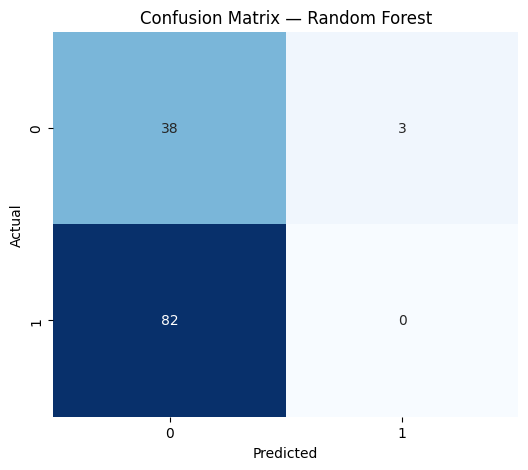

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_curve(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix — {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix_curve(y_test, y_pred_best, best_model_name)



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


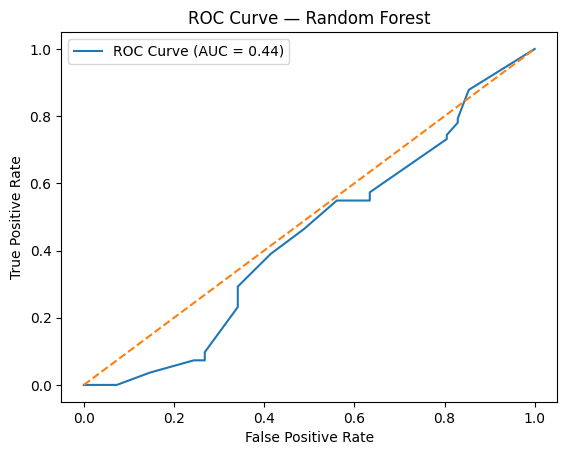

In [49]:
from sklearn.metrics import roc_curve, auc

y_prob = best_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve — {best_model_name}')
plt.legend()
plt.show()


In [50]:
pred_data = pd.DataFrame([['1','0','0','1','0','128','2','5849']],columns=['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Property_Area','Total_Income'])

In [51]:
pred_data = scaler.transform(pred_data)

In [52]:
model.predict(pred_data)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0])

In [53]:
import pickle as pk

In [54]:
pk.dump(model, open('model.pkl','wb'))

In [55]:
pk.dump(scaler,open('scaler.pkl','wb'))